## Solution de référence
***
<br>

# ITSMO > Échantillonnage et repliement du spectre
L'échantillonnnage d'un signal consiste à faire l'acquisition des données à intervalles réguliers. Cet intervalle (supposé ici constant pendant toute la durée de la mesure) est la période d'échantillonnage $Te$. Son inverse est par définition la fréquence d'échantillonnage $\nu e \triangleq 1/Te$.

Pour qu'il n'y ait pas de perte d'information ni d'analyse erronnée, la fréquence d'échantillonnage doit satisfaire le théorème de Shannon qui s'énonce de la façon suivante : $\nu e \geq 2\cdot\nu_{max}$, où $\nu_{max}$ est la fréquence maximum du signal. Si ce n'est pas le cas, alors le phénomène de repliement du spectre apparaît.

## Simulation d'un signal périodique
Pour étudier l'effet de l'échantillonnage, nous allons créer un signal dont le spectre et la fréquence maximum $\nu_{max}$ sont parfaitement connus, et nous allons faire varier la fréquence d'échantillonnage $\nu e$ de façon à respecter ou pas le théorème de Shannon.

Soit un signal temporel continu constitué de deux fréquences distinctes : $\nu_1 = 0.2 Hz$ et $\nu_2 = 0.5 Hz$ (somme de deux sinusoïdes de fréquences différentes, et d'amplitudes différentes afin de les distinguer).
<br>$x(t) = 2 \cdot sin(2 \cdot \pi \cdot \nu_1 \cdot t) + sin(2 \cdot \pi \cdot \nu_2 \cdot t)$
<br>Le spectre de ce signal est donc constitué de diracs pics d'amplitudes différentes et situés aux fréquences $0.2$ et $0.5 Hz$, et sa fréquence maximum $\nu_{max}$ est égale à $0.5 Hz$.

> Exécutez le code ci-dessous.

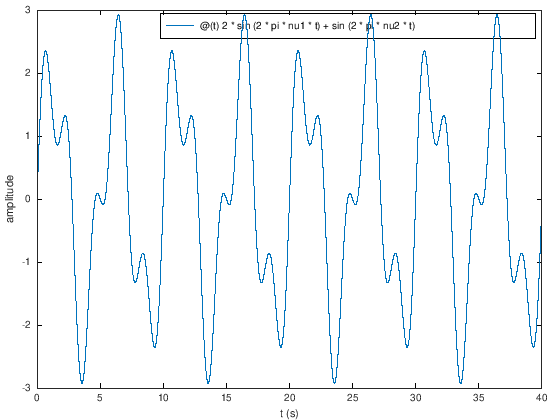

In [1]:
% Génération du signal périodique
nu1 = 0.2; % Hz
nu2 = 0.5; % Hz
x = @(t) 2*sin(2*pi*nu1*t)+sin(2*pi*nu2*t);

% Représentation temporelle
fplot(x, [0 40])
xlabel('t (s)')
ylabel('amplitude')

### Échantillonnage du signal à une fréquence suffisante $\rightarrow$ pas de repliement du spectre
Soit une fréquence d'échantillonnage $\nu e = 2 Hz > 2\cdot \nu_{max}$. Il n'y a pas de repliement du spectre, donc il doit être possible de déterminer correctement les deux fréquences du signal sur la représentation fréquentielle entre $0$ et $\nu e / 2$.
> Exécutez le code ci-dessous.

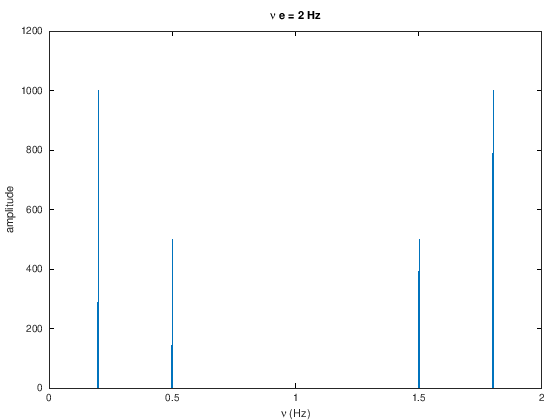

In [2]:
% Échantillonnage du signal périodique
nue = 2; % Hz
Te = 1/nue; %s
N = 1000;
t = 0:Te:(N-1)*Te;
xn = x(t);

% Représentation fréquentielle (module de la transformée de Fourier)
Xn = fft(xn);
nu = 0:nue/(N-1):nue;
plot(nu,abs(Xn))
xlabel('\nu (Hz)')
ylabel('amplitude')
title('\nu e = 2 Hz')

### Échantillonnage du signal à la fréquence minimum nécessaire $\rightarrow$ pas de repliement du spectre
Soit une fréquence d'échantillonnage $\nu e = 0.999 Hz \approx 2\cdot \nu_{max}$. Il n'y a pas de repliement du spectre, donc il doit être possible de déterminer correctement les deux fréquences du signal sur la représentation fréquentielle entre $0$ et $\nu e / 2$.
> Écrivez puis exécutez le code correspondant. Vous pouvez copier / coller / adapter le code précédent.

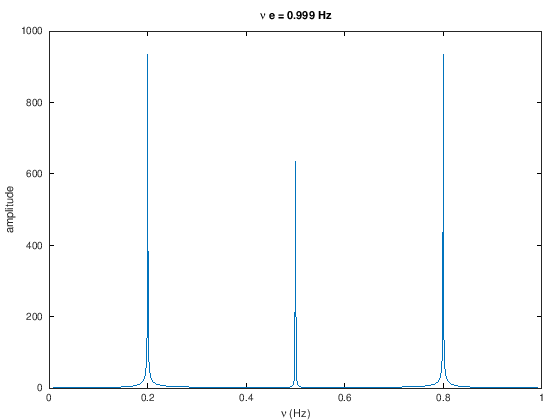

In [3]:
% Échantillonnage du signal périodique
nue = 0.999; % Hz
Te = 1/nue; %s
N = 1000;
t = 0:Te:(N-1)*Te;
xn = x(t);

% Représentation fréquentielle (module de la transformée de Fourier)
Xn = fft(xn);
nu = 0:nue/(N-1):nue;
plot(nu,abs(Xn))
xlabel('\nu (Hz)')
ylabel('amplitude')
title('\nu e = 0.999 Hz')

### Échantillonnage du signal à une fréquence insuffisante $\rightarrow$ repliement du spectre
SSoit une fréquence d'échantillonnage $\nu e = 0.8 Hz < 2\cdot \nu_{max}$. Il y a repliement du spectre, donc il ne doit pas être possible de déterminer correctement les deux fréquences du signal sur la représentation fréquentielle entre $0$ et $\nu e / 2$.
> Écrivez puis exécutez le code correspondant. Vous pouvez copier / coller / adapter le code précédent.

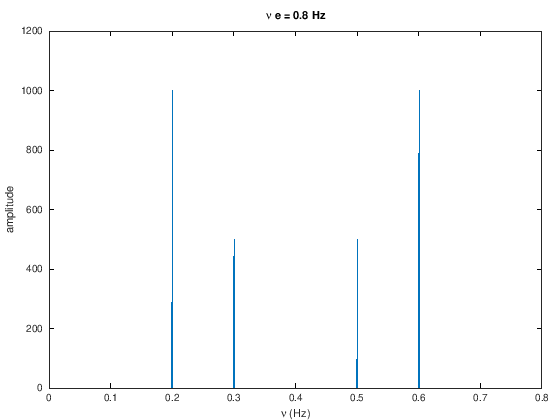

In [4]:
% Échantillonnage du signal périodique
nue = 0.8; % Hz
Te = 1/nue; %s
N = 1000;
t = 0:Te:(N-1)*Te;
xn = x(t);

% Représentation fréquentielle (module de la transformée de Fourier)
Xn = fft(xn);
nu = 0:nue/(N-1):nue;
plot(nu,abs(Xn))
xlabel('\nu (Hz)')
ylabel('amplitude')
title('\nu e = 0.8 Hz')

## Signal réel mesuré
Nous allons étudier le spectre d'un signal réel mesuré. Ce signal a été échantillonné à une certaine fréquence d'échantillonnage $\nu e$, qui respecte *probablement* le théorème de Shannon. Une opération de "sous-échantillonnage" (ré-échantillonnage à une fréquence plus faible) permet de mettre en évidence l'effet du choix de $\nu e$.

Soit un signal de mesure de température $T$ (salle de travaux pratiques ENSCBP) échantillonné à la fréquence $\nu e = 1 Hz$ et enregistré dans un fichier de données.
> Exécutez le code ci-dessous.

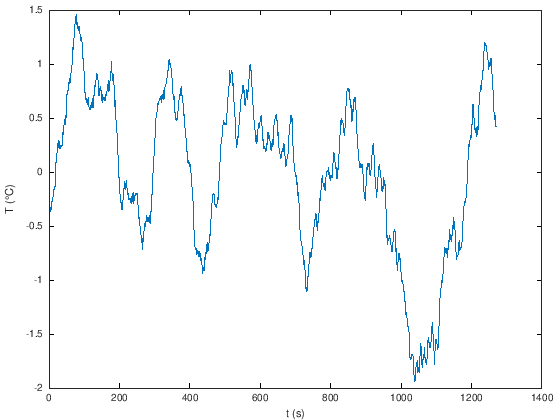

In [5]:
% Chargement du signal mesuré (enregistré à la fréquence de 1 Hz dans la 4ème colonne du fichier "sb2.dat")
data = load ('data/sb2.dat');
T = data(:,4);
nue = 1; % Hz
Te = 1/nue; % s
N = length(T);

% Retrait de la composante continue
T = T - mean(T);

% Représentation temporelle
t = 0:Te:(N-1)*Te;
plot(t,T)
xlabel('t (s)')
ylabel('T (\degC)')

### Représentation fréquentielle du signal échantillonné à la fréquence $\nu e = 1 Hz$ 
Pour faire l'acquisition de ce signal, une fréquence d'échantillonnage $\nu e = 1 Hz$ a été choisie . Mais, ne connaissant pas la fréquence maximum $\nu_{max}$ du signal (il serait possible de l'estimer), il est impossible de dire *a priori* si ce choix de $\nu e$ est pertinent ou pas (c'est-à-dire s'il évite le repliement du spectre ou pas).
> Écrivez puis exécutez le code permettant de calculer puis de tracer le module de la transformée de Fourier du signal $T$. Vous pouvez copier / coller / adapter le code précédent.

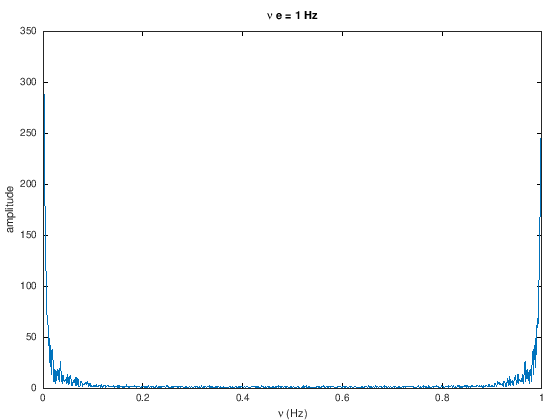

In [6]:
% Représentation fréquentielle (module de la transformée de Fourier)
X = fft(T);
nu = 0:1/((N-1)*Te):1/Te;
plot(nu,abs(X))
xlabel('\nu (Hz)')
ylabel('amplitude')
title('\nu e = 1 Hz')

### Représentation fréquentielle du signal sous-échantillonné à la fréquence $\nu e = 0.1 Hz$ 
Le sous-échantillonnage du signal au dixième de la fréquence d'échantillonnage réelle consiste à ne conserver qu'une valeur enregistrée sur dix. Le signal obtenu est donc celui qui aurait pu être obtenu avec une fréquence d'échantillonnage $\nu e = 0.1 Hz$, ce qui permet d'observer l'effet de ce choix.
> Complétez puis exécutez le code correspondant. Vous pouvez copier / coller / adapter le code précédent. 
> <br>Vous pouvez aussi essayer d'autres rapports de sous-échantillonnage.

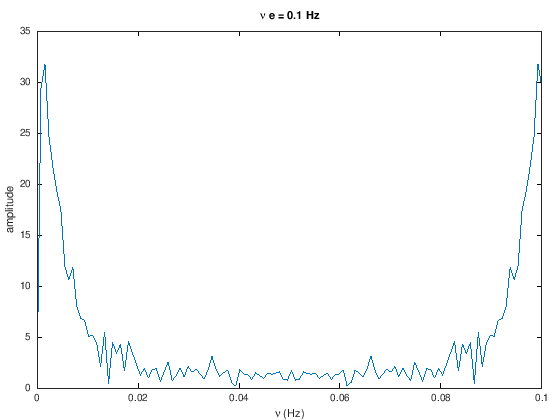

In [7]:
% Sous échantillonnage
nue = 0.1; % Hz
Te = 1/nue; % s
T = T(1:Te:end);
N = length(T);

% Représentation fréquentielle (module de la transformée de Fourier)
X = fft(T);
nu = 0:1/((N-1)*Te):1/Te;
plot(nu,abs(X))
xlabel('\nu (Hz)')
ylabel('amplitude')
title('\nu e = 0.1 Hz')